In [28]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [29]:
pd.__version__

'2.2.3'

In [30]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [31]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [32]:
len(df.columns)

19

In [33]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds() / 60

In [34]:
df.duration.mean()

16.01590961997241

In [35]:
df.duration.std()

42.84210176105097

In [36]:
len(df[(df.duration >= 1) & (df.duration <= 60)]) / len(df) * 100

98.00944077722545

In [37]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

In [38]:
categorical = ['PULocationID', 'DOLocationID']

In [39]:
df[categorical] = df[categorical].astype(str)

In [40]:
train_dicts = df[categorical].to_dict(orient='records')

In [41]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [42]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (2855951, 514)


In [43]:
target = 'duration'
y_train = df[target].values

In [44]:
import numpy as np

# Train your model
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

# Calculate MSE
mse = mean_squared_error(y_train, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'Train RMSE: {rmse}')

Train RMSE: 7.778948467984793


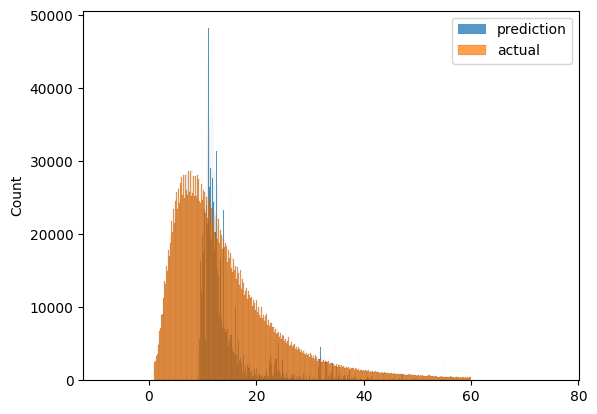

In [45]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend();

In [46]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [ ]:
df_val = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [ ]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [ ]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

In [ ]:
y_pred = lr.predict(X_val)

In [ ]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')